In [1]:
# %load_ext rpy2.ipython
%matplotlib inline
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [9]:
df = pd.read_csv("/home/pengli/Downloads/predictdata/data_upload/daily111.csv")
df = df.rename(columns={'inc_day':'ds', 'all_fee_rmb':'y'})
df["y"]=df["y"].astype("int64")
# df["inc_day"]=df["inc_day"].astype("float")
print (type(df))
print (df.dtypes)
# df["all_fee_rmb"] = np.log(df["all_fee_rmb"])
df.head()

<class 'pandas.core.frame.DataFrame'>
ds    object
y      int64
dtype: object


,ds,y
0,2015-07-01,1214
1,2015-07-02,1191
2,2015-07-03,1230
3,2015-07-04,920
4,2015-07-05,758


In [11]:
m = Prophet()
m.fit(df)
# 
# print("predict")
# 预测，将结果放入forecast数据框
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
print (forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
1122,2018-07-27,389.792624,-47.891010,882.954043
1123,2018-07-28,98.370548,-340.362320,536.655126
1124,2018-07-29,-51.208165,-496.847010,397.760505
1125,2018-07-30,264.859082,-175.800279,736.592730
1126,2018-07-31,303.562066,-183.131554,769.127691


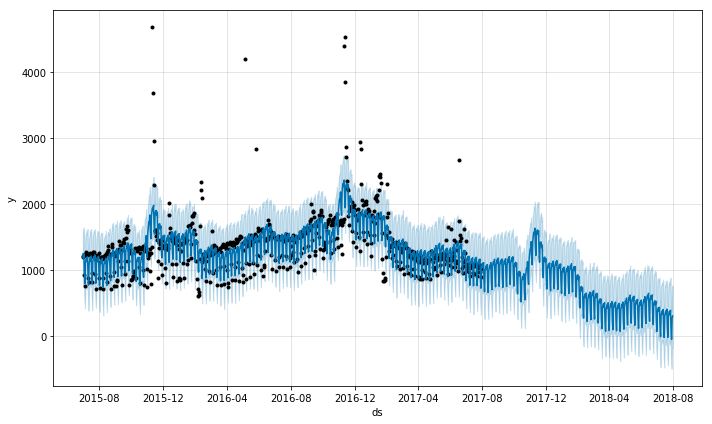

In [12]:
# m.plot(forecast)
m.plot(forecast).show()

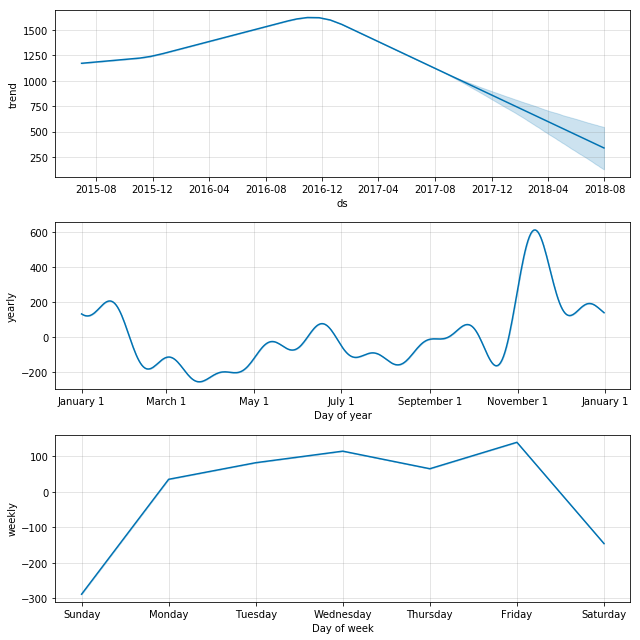

In [13]:
m.plot_components(forecast).show()